Download chord .lab files

In [1]:
!pip install mir_eval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.7/90.7 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mir_eval: filename=mir_eval-0.7-py3-none-any.whl size=100699 sha256=3591988c1a5011b32ccbb0a39a7f85576d708c0e571c8597f85c7c1c10d7acd9
  Stored in directory: /root/.cache/pip/wheels/3e/2f/0d/dda9c4c77a170e21356b6afa2f7d9bb078338634ba05d94e3f
Successfully built mir_eval


In [2]:
%cd /content
%rm -rf /content/dataset
!mkdir -p /content/dataset/chords

/content


In [3]:
# prompt: Download from a list of links using wget

links = [
    "http://isophonics.net/files/annotations/The%20Beatles%20Annotations.tar.gz",
    "http://isophonics.net/files/annotations/Queen%20Annotations.tar.gz ",
    "http://isophonics.net/files/annotations/Carole%20King%20Annotations.tar.gz",
    "http://isophonics.net/files/annotations/Michael%20Jackson%20Annotations.tar.gz",
    "http://isophonics.net/files/annotations/Zweieck%20Annotations.tar.gz"

]

for link in links:
  !wget -O /content/dataset/{link.split('/')[-1]} {link} -P /content/dataset


--2024-09-24 02:13:24--  http://isophonics.net/files/annotations/The%20Beatles%20Annotations.tar.gz
Resolving isophonics.net (isophonics.net)... 138.37.95.150
Connecting to isophonics.net (isophonics.net)|138.37.95.150|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2779640 (2.7M) [application/x-gzip]
Saving to: ‘/content/dataset/The%20Beatles%20Annotations.tar.gz’

The%20Beatles%20Ann 100%[===================>]   2.65M  4.93MB/s    in 0.5s    

2024-09-24 02:13:25 (4.93 MB/s) - ‘/content/dataset/The%20Beatles%20Annotations.tar.gz’ saved [2779640/2779640]

--2024-09-24 02:13:25--  http://isophonics.net/files/annotations/Queen%20Annotations.tar.gz
Resolving isophonics.net (isophonics.net)... 138.37.95.150
Connecting to isophonics.net (isophonics.net)|138.37.95.150|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 227243 (222K) [application/x-gzip]
Saving to: ‘/content/dataset/Queen%20Annotations.tar.gz’

Queen%20Annotations 100%[==========

In [4]:
%cd /content/dataset

/content/dataset


In [5]:
# prompt: extract only the folder chordlab in all tar.gz files

import tarfile
import os

%cd /content/dataset

for filename in os.listdir():
  if filename.endswith(".tar.gz"):
    with tarfile.open(filename, "r:gz") as tar:
      for member in tar.getmembers():
        if 'chordlab' in member.name:
          tar.extract(member)


/content/dataset


In [6]:
# prompt: Copy all .lab files  in /content/dataset/chordlab and its sub dirs

import shutil
import os

def copy_lab_files(src_dir, dest_dir):
  for root, dirs, files in os.walk(src_dir):
    for file in files:
      if file.endswith(".lab"):
        src_file = os.path.join(root, file)
        dest_file = os.path.join(dest_dir, file)
        shutil.copy(src_file, dest_file)


copy_lab_files("/content/dataset/chordlab", "/content/dataset/chords/")


In [7]:
%cd /content
!git clone https://github.com/tmc323/Chord-Annotations.git

/content
Cloning into 'Chord-Annotations'...
remote: Enumerating objects: 1089, done.
remote: Total 1089 (delta 0), reused 0 (delta 0), pack-reused 1089 (from 1)
Receiving objects: 100% (1089/1089), 666.37 KiB | 8.13 MiB/s, done.
Resolving deltas: 100% (441/441), done.


In [8]:
# prompt: Copy all .lab file in /content/Chord-Annotations/uspopLabels and its sub dirs

import shutil
import os

# source_dir = "/content/Chord-Annotations/uspopLabels"
source_dir = "/content/Chord-Annotations/"
destination_dir = "/content/dataset/chords"

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

for root, dirs, files in os.walk(source_dir):
  for file in files:
    if file.endswith(".lab"):
      source_file_path = os.path.join(root, file)
      destination_file_path = os.path.join(destination_dir, file)
      shutil.copy2(source_file_path, destination_file_path)


In [9]:
%cd /content
!git clone https://github.com/chordify/CASD.git
!pip install jams

import jams
# jam = jams.load("/content/CASD/jams/1012.jams")
# jam['annotations'][0]['data'][0].value

!mkdir /content/CASD/labs

import os
import jams

def write_to_lab(filename, data):
  with open(filename, 'w') as f:
    for d in data:
      f.write(f"{d.time:.3f} {d.time + d.duration:.3f} {d.value}\n")

jams_dir = "/content/CASD/jams"

for filename in os.listdir(jams_dir):
  if filename.endswith(".jams"):
    jam_path = os.path.join(jams_dir, filename)
    jam = jams.load(jam_path)
    filename_no_ext = os.path.splitext(filename)[0]
    lab_path = os.path.join("/content/CASD/labs", filename_no_ext + ".lab")
    write_to_lab(lab_path, jam['annotations'][0]['data'])

!cp /content/CASD/labs/* /content/dataset/chords

/content
Cloning into 'CASD'...
remote: Enumerating objects: 94, done.
remote: Total 94 (delta 0), reused 0 (delta 0), pack-reused 94 (from 1)
Receiving objects: 100% (94/94), 1.31 MiB | 8.58 MiB/s, done.
Resolving deltas: 100% (64/64), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for jams: filename=jams-0.3.4-py3-none-any.whl size=64901 sha256=7115f9e5c220d983b93cd86ba6d7ab1f5c2e46053cc506213f2b1c3e9db36e49
  Stored in directory: /root/.cache/pip/wheels/28/9a/f7/fb386b6bc5a75a3ef198a50e98b221e94a381472332b65cf24
Successfully built jams


In [10]:
%cd /content
!git clone https://github.com/keunwoochoi/lstm_real_book.git
!mkdir /content/tmp
!unzip /content/lstm_real_book/more_data_to_play_with/jazz_xlab.zip -d /content/tmp

# prompt: write content xlab file to lab file

import os

def convert_xlab_to_lab(xlab_dir, lab_dir):
  """Converts .xlab files to .lab files.

  Args:
    xlab_dir: The directory containing .xlab files.
    lab_dir: The directory to save .lab files.
  """

  for filename in os.listdir(xlab_dir):
    if filename.endswith(".xlab"):
      xlab_path = os.path.join(xlab_dir, filename)
      lab_path = os.path.join(lab_dir, filename[:-5] + ".lab")

      with open(xlab_path, 'r') as xlab_file, open(lab_path, 'w') as lab_file:
        for line in xlab_file:
          line = line.strip()
          data = line.split(" ")
          if len(data) >= 5:
            lab_file.write(f"{float(data[1]):.3f} {float(data[3]):.3f} {data[4]}\n")

# Example usage:
xlab_dir = "/content/tmp/jazz_xlab"
lab_dir = "/content/dataset/chords"
convert_xlab_to_lab(xlab_dir, lab_dir)


/content
Cloning into 'lstm_real_book'...
remote: Enumerating objects: 2891, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 2891 (delta 0), reused 2 (delta 0), pack-reused 2887 (from 1)
Receiving objects: 100% (2891/2891), 4.88 MiB | 9.73 MiB/s, done.
Resolving deltas: 100% (39/39), done.
Archive:  /content/lstm_real_book/more_data_to_play_with/jazz_xlab.zip
   creating: /content/tmp/jazz_xlab/
  inflating: /content/tmp/jazz_xlab/'deed I Do.Mgu.xlab  
  inflating: /content/tmp/jazz_xlab/'Most Every Morning.MGU.xlab  
  inflating: /content/tmp/jazz_xlab/'round Midnight - Thelonious Monk.Mgu.xlab  
  inflating: /content/tmp/jazz_xlab/'s Wonderful.Mgu.xlab  
  inflating: /content/tmp/jazz_xlab/'t Ain't Nobody's Business If I Do.Mgu.xlab  
  inflating: /content/tmp/jazz_xlab/'til There Was You.Mgu.xlab  
  inflating: /content/tmp/jazz_xlab/(All Of A Sudden) My Heart Sings.Mgu.xlab  
  inflating: /content/tmp/jazz_xlab/(Home In

In [11]:
# prompt: count how many file in chords

import os

chord_dir = "/content/dataset/chords/"
file_count = len([name for name in os.listdir(chord_dir) if os.path.isfile(os.path.join(chord_dir, name))])
print(f"There are {file_count} files in the 'chords' directory.")


There are 3416 files in the 'chords' directory.


Preprocessing

In [12]:
# prompt: Extract chords in these .lab file, which has the format of: start_time, end_time, chord. Then each chord is an element of a list A, then append list A to a list B

B = []
for filename in os.listdir(chord_dir):
  if filename.endswith(".lab"):
    A = []
    with open(os.path.join(chord_dir, filename), 'r') as f:
      for line in f:
        parts = line.strip().split()
        if len(parts) >= 3:
          chord = parts[2]
          A.append(chord)
    B.append(A)
print(B)
print(len(B))

[['F:maj6', 'D:min7', 'G:min7', 'C:maj(b7,9,11,13)', 'A:min7', 'Bb:7', 'A:7', 'D:7', 'G:min', 'C:maj6', 'C:7', 'F:maj', 'D:7', 'G:min', 'C:maj6', 'C:7', 'F:maj', 'A:7', 'D:7', 'G:7', 'C:7', 'C#:(1,5)', 'F:maj', 'C:7', 'G:min', 'C:maj6', 'C:7', 'F:maj', 'D:7', 'G:min', 'C:maj6', 'C:7', 'F:maj', 'A:7', 'D:7', 'G:7', 'G:min', 'C:maj6', 'C:7', 'F:maj', 'C:7'], ['C:7', 'C:7', 'F:maj', 'Db:7', 'C:7', 'F:maj7', 'F:maj6', 'F:7', 'Bb:maj', 'B:dim', 'C:7', 'G:min7', 'C:7', 'G:min7', 'F:maj', 'Gb:dim', 'G:min7', 'C:7', 'F:maj', 'Gb:7', 'F:7', 'B:7', 'Bb:maj', 'B:dim', 'C:7', 'G:min7', 'C:7', 'F:maj', 'Gb:7', 'F:7', 'Bb:maj', 'B:dim', 'F:maj', 'D:9', 'G:9', 'Ab:9', 'G:7', 'G:9', 'G:min7', 'C:7', 'G:min7', 'C:7', 'D:7', 'E:7', 'F:maj', 'Gb:7', 'F:7', 'B:7', 'Bb:maj7', 'Bb:maj6', 'B:dim', 'C:7', 'G:min7', 'C:7', 'F:maj', 'D:min7', 'G:min7', 'C:7'], ['F:maj7', 'D:min7', 'G:min7', 'C:9', 'Bb:maj7', 'A:min7', 'D:min7', 'G:min7', 'E:hdim', 'A:7', 'D:min7', 'Eb:maj7', 'D:min7', 'Eb:maj7', 'D:min7', 'Eb:m

In [13]:
# prompt: Find and sort unique chord in B

def get_unique_chords(chords):
  unique_chords = set()
  for chord_list in chords:
    for chord in chord_list:
      unique_chords.add(chord)

  sorted_unique_chords = sorted(list(unique_chords))
  return sorted_unique_chords

def print_unique_chords(chords):
  unique_chords = get_unique_chords(chords)
  print(f"Unique chords: {len(unique_chords)}")
  for chord in unique_chords:
    print(chord, end=', ')

print_unique_chords(B)


Unique chords: 2176
A, A#:(1,*3,*5), A#:7, A#:dim, A#:dim7, A#:hdim7, A#:maj, A#:maj(*3), A#:maj/5, A#:maj6, A#:maj7, A#:min, A#:min(9), A#:min/b3, A#:min7, A#:min7(b5), A#:sus2, A#:sus4, A#:sus4(b7), A/2, A/3, A/4, A/5, A/6, A/7, A/9, A/b3, A/b6, A/b7, A:(1), A:(1,2,4), A:(1,2,4,5), A:(1,3,b5)/b5, A:(1,3,b5,b7,9,13), A:(1,3,b5,b7,b9,13), A:(1,4), A:(1,4,5,b7,9,11,13), A:(1,5), A:(1,5)/2, A:(1,5)/3, A:(1,b3,b5), A:(1,b3,b5,6), A:6, A:6(9), A:6(9)/3, A:6(9)/5, A:7, A:7(#5), A:7(#9), A:7(*5,13), A:7(11), A:7(13), A:7(b5,*5), A:7(b5,*5)/b5, A:7(b5,*5,b9), A:7(b9), A:7(b9)/b2, A:7(s11), A:7(s5,*5), A:7(s5,*5,b9), A:7(s5,*5,s9), A:7(s9), A:7(s9,s11,b13), A:7/2, A:7/3, A:7/5, A:7/6, A:7/b5, A:7/b7, A:9, A:9(11), A:9(b5,*5), A:9(s11), A:9(s5,*5), A:9/3, A:9/5, A:9/b7, A:aug, A:aug(b7), A:aug(b7)/b5, A:aug(b7,9), A:aug/#5, A:aug/3, A:dim, A:dim(b13), A:dim/6, A:dim/b2, A:dim/b3, A:dim/b5, A:dim7, A:dim7/b3, A:hdim, A:hdim(9), A:hdim/4, A:hdim/b3, A:hdim/b5, A:hdim7, A:maj, A:maj(*1)/3, A:maj(*

In [14]:
# prompt: Remove / and what after it
import re
def remove_slash_and_after(chord):
  if '/' in chord:
    return chord.split('/')[0]
  else:
    return chord
def remove_colon(chord):
    # Remove colon if nothing follows it
    chord = re.sub(r':\s*$', '', chord)
    return chord


new_B_no_slash = []
for chord_list in B:
  new_chord_list = []
  for chord in chord_list:
    new_chord = remove_slash_and_after(chord)
    new_chord = remove_colon(new_chord)
    new_chord_list.append(new_chord)
  new_B_no_slash.append(new_chord_list)

print_unique_chords(new_B_no_slash)

Unique chords: 1155
A, A#:(1,*3,*5), A#:7, A#:dim, A#:dim7, A#:hdim7, A#:maj, A#:maj(*3), A#:maj6, A#:maj7, A#:min, A#:min(9), A#:min7, A#:min7(b5), A#:sus2, A#:sus4, A#:sus4(b7), A:(1), A:(1,2,4), A:(1,2,4,5), A:(1,3,b5), A:(1,3,b5,b7,9,13), A:(1,3,b5,b7,b9,13), A:(1,4), A:(1,4,5,b7,9,11,13), A:(1,5), A:(1,b3,b5), A:(1,b3,b5,6), A:6, A:6(9), A:7, A:7(#5), A:7(#9), A:7(*5,13), A:7(11), A:7(13), A:7(b5,*5), A:7(b5,*5,b9), A:7(b9), A:7(s11), A:7(s5,*5), A:7(s5,*5,b9), A:7(s5,*5,s9), A:7(s9), A:7(s9,s11,b13), A:9, A:9(11), A:9(b5,*5), A:9(s11), A:9(s5,*5), A:aug, A:aug(b7), A:aug(b7,9), A:dim, A:dim(b13), A:dim7, A:hdim, A:hdim(9), A:hdim7, A:maj, A:maj(*1), A:maj(*3), A:maj(*3,*5), A:maj(*3,9), A:maj(*5), A:maj(2), A:maj(2,*3), A:maj(4), A:maj(7,9,11,13), A:maj(9), A:maj(b7,9,11,13), A:maj(b7,9,s11,13), A:maj(b7,b9,11,13), A:maj(b7,s9,11,13), A:maj6, A:maj7, A:maj7(*3), A:maj7(9), A:maj9, A:maj9(#11), A:min, A:min(*5), A:min(2), A:min(4), A:min(6), A:min(6,9), A:min(7), A:min(9), A:min(b

In [15]:
new_B_parentheses = []
for chord_list in new_B_no_slash:
  new_chord_list = []
  for chord in chord_list:
    if ':' in chord and chord.split(':')[1].isdigit() and chord.split(':')[1] != '7' and chord.split(':')[1] != '9':
      new_chord = chord.split(':')[0] + f":({chord.split(':')[1]})"
    else:
      new_chord = chord
    new_chord_list.append(new_chord)
  new_B_parentheses.append(new_chord_list)

print_unique_chords(new_B_parentheses)

Unique chords: 1153
A, A#:(1,*3,*5), A#:7, A#:dim, A#:dim7, A#:hdim7, A#:maj, A#:maj(*3), A#:maj6, A#:maj7, A#:min, A#:min(9), A#:min7, A#:min7(b5), A#:sus2, A#:sus4, A#:sus4(b7), A:(1), A:(1,2,4), A:(1,2,4,5), A:(1,3,b5), A:(1,3,b5,b7,9,13), A:(1,3,b5,b7,b9,13), A:(1,4), A:(1,4,5,b7,9,11,13), A:(1,5), A:(1,b3,b5), A:(1,b3,b5,6), A:(6), A:6(9), A:7, A:7(#5), A:7(#9), A:7(*5,13), A:7(11), A:7(13), A:7(b5,*5), A:7(b5,*5,b9), A:7(b9), A:7(s11), A:7(s5,*5), A:7(s5,*5,b9), A:7(s5,*5,s9), A:7(s9), A:7(s9,s11,b13), A:9, A:9(11), A:9(b5,*5), A:9(s11), A:9(s5,*5), A:aug, A:aug(b7), A:aug(b7,9), A:dim, A:dim(b13), A:dim7, A:hdim, A:hdim(9), A:hdim7, A:maj, A:maj(*1), A:maj(*3), A:maj(*3,*5), A:maj(*3,9), A:maj(*5), A:maj(2), A:maj(2,*3), A:maj(4), A:maj(7,9,11,13), A:maj(9), A:maj(b7,9,11,13), A:maj(b7,9,s11,13), A:maj(b7,b9,11,13), A:maj(b7,s9,11,13), A:maj6, A:maj7, A:maj7(*3), A:maj7(9), A:maj9, A:maj9(#11), A:min, A:min(*5), A:min(2), A:min(4), A:min(6), A:min(6,9), A:min(7), A:min(9), A:min

In [16]:
for i, chord_list in enumerate(new_B_parentheses):
  for j, chord in enumerate(chord_list):
    if chord == 'F#min7':
      new_B_parentheses[i][j] = 'F#:min7'

In [17]:
import mir_eval
mir_chords = []
for chord_list in new_B_parentheses:
  new_chord_list = []
  for chord in chord_list:
    if chord == 'N':
      new_chord_list.append('N')
    else:
      try:
        x, y, z, t = mir_eval.chord.split(chord)
        new_chord = mir_eval.chord.join(x, y)
        new_chord_list.append(new_chord)
      except:
        new_chord_list.append('X')
  mir_chords.append(new_chord_list)

print_unique_chords(mir_chords)

Unique chords: 288
A, A#, A#:7, A#:dim, A#:dim7, A#:hdim7, A#:maj, A#:maj6, A#:maj7, A#:min, A#:min7, A#:sus2, A#:sus4, A:7, A:9, A:aug, A:dim, A:dim7, A:hdim7, A:maj, A:maj6, A:maj7, A:maj9, A:min, A:min11, A:min6, A:min7, A:min9, A:sus2, A:sus4, Ab, Ab:7, Ab:9, Ab:aug, Ab:dim, Ab:maj, Ab:maj6, Ab:maj7, Ab:maj9, Ab:min, Ab:min6, Ab:min7, Ab:min9, Ab:sus2, Ab:sus4, B, B:11, B:7, B:9, B:aug, B:dim, B:dim7, B:hdim7, B:maj, B:maj6, B:maj7, B:maj9, B:min, B:min6, B:min7, B:min9, B:sus2, B:sus4, Bb, Bb:11, Bb:13, Bb:7, Bb:9, Bb:aug, Bb:dim, Bb:dim7, Bb:maj, Bb:maj6, Bb:maj7, Bb:maj9, Bb:min, Bb:min6, Bb:min7, Bb:min9, Bb:sus2, Bb:sus4, C, C#, C#:7, C#:9, C#:aug, C#:dim, C#:hdim7, C#:maj, C#:maj6, C#:maj7, C#:min, C#:min11, C#:min6, C#:min7, C#:min9, C#:sus2, C#:sus4, C:7, C:9, C:aug, C:dim, C:dim7, C:hdim7, C:maj, C:maj13, C:maj6, C:maj7, C:maj9, C:min, C:min6, C:min7, C:min9, C:sus2, C:sus4, Cb:7, Cb:9, Cb:maj, Cb:maj6, Cb:maj7, Cb:min, D, D#, D#:7, D#:9, D#:aug, D#:dim, D#:dim7, D#:hdim7,

In [18]:
for i, chord_list in enumerate(mir_chords):
  for j, chord in enumerate(chord_list):
    if chord == 'N' or chord == 'X':
      continue
    x, y, z, t = mir_eval.chord.split(chord)
    new_chord = mir_eval.chord.join(x, y)
    mir_chords[i][j] = new_chord

print_unique_chords(mir_chords)

Unique chords: 271
A#:7, A#:dim, A#:dim7, A#:hdim7, A#:maj, A#:maj6, A#:maj7, A#:min, A#:min7, A#:sus2, A#:sus4, A:7, A:9, A:aug, A:dim, A:dim7, A:hdim7, A:maj, A:maj6, A:maj7, A:maj9, A:min, A:min11, A:min6, A:min7, A:min9, A:sus2, A:sus4, Ab:7, Ab:9, Ab:aug, Ab:dim, Ab:maj, Ab:maj6, Ab:maj7, Ab:maj9, Ab:min, Ab:min6, Ab:min7, Ab:min9, Ab:sus2, Ab:sus4, B:11, B:7, B:9, B:aug, B:dim, B:dim7, B:hdim7, B:maj, B:maj6, B:maj7, B:maj9, B:min, B:min6, B:min7, B:min9, B:sus2, B:sus4, Bb:11, Bb:13, Bb:7, Bb:9, Bb:aug, Bb:dim, Bb:dim7, Bb:maj, Bb:maj6, Bb:maj7, Bb:maj9, Bb:min, Bb:min6, Bb:min7, Bb:min9, Bb:sus2, Bb:sus4, C#:7, C#:9, C#:aug, C#:dim, C#:hdim7, C#:maj, C#:maj6, C#:maj7, C#:min, C#:min11, C#:min6, C#:min7, C#:min9, C#:sus2, C#:sus4, C:7, C:9, C:aug, C:dim, C:dim7, C:hdim7, C:maj, C:maj13, C:maj6, C:maj7, C:maj9, C:min, C:min6, C:min7, C:min9, C:sus2, C:sus4, Cb:7, Cb:9, Cb:maj, Cb:maj6, Cb:maj7, Cb:min, D#:7, D#:9, D#:aug, D#:dim, D#:dim7, D#:hdim7, D#:maj, D#:maj6, D#:maj7, D#:mi

In [19]:
# NOT USED
# quality_classes = ['min', 'maj', 'dim', 'aug', 'min6', 'maj6',
#                  'min7', 'minmaj7', 'maj7', '7', 'dim7', 'hdim7',
#                  'sus2', 'sus4']

# def classify_chord(chord):
#     if ':' in chord:
#       if chord.split(':')[1] in quality_classes:
#         return chord
#       else:
#         return 'X'
#     else:
#       return chord


# new_B_classified = []
# for chord_list in mir_chords:
#   new_chord_list = []
#   for chord in chord_list:
#     new_chord = classify_chord(chord)
#     new_chord_list.append(new_chord)
#   new_B_classified.append(new_chord_list)


# print_unique_chords(new_B_classified)


In [20]:

for i, chord_list in enumerate(mir_chords):
  for j, chord in enumerate(chord_list):
    if chord.startswith('Cb') or chord.startswith('Fb'):
      mir_chords[i][j] = 'X'

print_unique_chords(mir_chords)


Unique chords: 262
A#:7, A#:dim, A#:dim7, A#:hdim7, A#:maj, A#:maj6, A#:maj7, A#:min, A#:min7, A#:sus2, A#:sus4, A:7, A:9, A:aug, A:dim, A:dim7, A:hdim7, A:maj, A:maj6, A:maj7, A:maj9, A:min, A:min11, A:min6, A:min7, A:min9, A:sus2, A:sus4, Ab:7, Ab:9, Ab:aug, Ab:dim, Ab:maj, Ab:maj6, Ab:maj7, Ab:maj9, Ab:min, Ab:min6, Ab:min7, Ab:min9, Ab:sus2, Ab:sus4, B:11, B:7, B:9, B:aug, B:dim, B:dim7, B:hdim7, B:maj, B:maj6, B:maj7, B:maj9, B:min, B:min6, B:min7, B:min9, B:sus2, B:sus4, Bb:11, Bb:13, Bb:7, Bb:9, Bb:aug, Bb:dim, Bb:dim7, Bb:maj, Bb:maj6, Bb:maj7, Bb:maj9, Bb:min, Bb:min6, Bb:min7, Bb:min9, Bb:sus2, Bb:sus4, C#:7, C#:9, C#:aug, C#:dim, C#:hdim7, C#:maj, C#:maj6, C#:maj7, C#:min, C#:min11, C#:min6, C#:min7, C#:min9, C#:sus2, C#:sus4, C:7, C:9, C:aug, C:dim, C:dim7, C:hdim7, C:maj, C:maj13, C:maj6, C:maj7, C:maj9, C:min, C:min6, C:min7, C:min9, C:sus2, C:sus4, D#:7, D#:9, D#:aug, D#:dim, D#:dim7, D#:hdim7, D#:maj, D#:maj6, D#:maj7, D#:min, D#:min7, D#:sus2, D#:sus4, D:7, D:9, D:aug,

In [21]:
import mir_eval

root_mapping = {
    'Db': 'C#',
    'Eb': 'D#',
    'Gb': 'F#',
    'Ab': 'G#',
    'Bb': 'A#'
}

B_final = []
for chord_list in mir_chords:
    new_chord_list = []
    for chord in chord_list:
      if ':' in chord:
        root = chord.split(':')[0]
        if root in root_mapping:
          new_chord = root_mapping[root] + ':' + chord.split(':')[1]
        else:
          new_chord = chord
      else:
        new_chord = chord
      new_chord_list.append(new_chord)
    B_final.append(new_chord_list)

print_unique_chords(B_final)

Unique chords: 200
A#:11, A#:13, A#:7, A#:9, A#:aug, A#:dim, A#:dim7, A#:hdim7, A#:maj, A#:maj6, A#:maj7, A#:maj9, A#:min, A#:min6, A#:min7, A#:min9, A#:sus2, A#:sus4, A:7, A:9, A:aug, A:dim, A:dim7, A:hdim7, A:maj, A:maj6, A:maj7, A:maj9, A:min, A:min11, A:min6, A:min7, A:min9, A:sus2, A:sus4, B:11, B:7, B:9, B:aug, B:dim, B:dim7, B:hdim7, B:maj, B:maj6, B:maj7, B:maj9, B:min, B:min6, B:min7, B:min9, B:sus2, B:sus4, C#:7, C#:9, C#:aug, C#:dim, C#:dim7, C#:hdim7, C#:maj, C#:maj6, C#:maj7, C#:maj9, C#:min, C#:min11, C#:min6, C#:min7, C#:min9, C#:sus2, C#:sus4, C:7, C:9, C:aug, C:dim, C:dim7, C:hdim7, C:maj, C:maj13, C:maj6, C:maj7, C:maj9, C:min, C:min6, C:min7, C:min9, C:sus2, C:sus4, D#:7, D#:9, D#:aug, D#:dim, D#:dim7, D#:hdim7, D#:maj, D#:maj6, D#:maj7, D#:maj9, D#:min, D#:min6, D#:min7, D#:min9, D#:sus2, D#:sus4, D:7, D:9, D:aug, D:dim, D:dim7, D:hdim7, D:maj, D:maj6, D:maj7, D:maj9, D:min, D:min6, D:min7, D:min9, D:sus2, D:sus4, E#:min7, E:7, E:9, E:aug, E:dim, E:dim7, E:hdim7, E:

In [22]:
for i, chord_list in enumerate(B_final):
  for j, chord in enumerate(chord_list):
    if ':' in chord and chord.split(':')[1] == 'maj':
      B_final[i][j] = chord.split(':')[0]

print_unique_chords(B_final)


Unique chords: 200
A, A#, A#:11, A#:13, A#:7, A#:9, A#:aug, A#:dim, A#:dim7, A#:hdim7, A#:maj6, A#:maj7, A#:maj9, A#:min, A#:min6, A#:min7, A#:min9, A#:sus2, A#:sus4, A:7, A:9, A:aug, A:dim, A:dim7, A:hdim7, A:maj6, A:maj7, A:maj9, A:min, A:min11, A:min6, A:min7, A:min9, A:sus2, A:sus4, B, B:11, B:7, B:9, B:aug, B:dim, B:dim7, B:hdim7, B:maj6, B:maj7, B:maj9, B:min, B:min6, B:min7, B:min9, B:sus2, B:sus4, C, C#, C#:7, C#:9, C#:aug, C#:dim, C#:dim7, C#:hdim7, C#:maj6, C#:maj7, C#:maj9, C#:min, C#:min11, C#:min6, C#:min7, C#:min9, C#:sus2, C#:sus4, C:7, C:9, C:aug, C:dim, C:dim7, C:hdim7, C:maj13, C:maj6, C:maj7, C:maj9, C:min, C:min6, C:min7, C:min9, C:sus2, C:sus4, D, D#, D#:7, D#:9, D#:aug, D#:dim, D#:dim7, D#:hdim7, D#:maj6, D#:maj7, D#:maj9, D#:min, D#:min6, D#:min7, D#:min9, D#:sus2, D#:sus4, D:7, D:9, D:aug, D:dim, D:dim7, D:hdim7, D:maj6, D:maj7, D:maj9, D:min, D:min6, D:min7, D:min9, D:sus2, D:sus4, E, E#:min7, E:7, E:9, E:aug, E:dim, E:dim7, E:hdim7, E:maj6, E:maj7, E:maj9, E:m

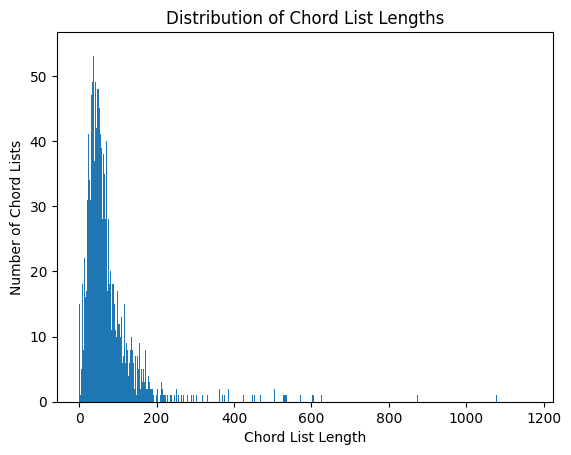

In [23]:
# prompt: plot number of element based on their length

import matplotlib.pyplot as plt

chord_lengths = [len(chord_list) for chord_list in B_final]
plt.hist(chord_lengths, bins=range(min(chord_lengths), max(chord_lengths) + 1))
plt.xlabel("Chord List Length")
plt.ylabel("Number of Chord Lists")
plt.title("Distribution of Chord List Lengths")
plt.show()


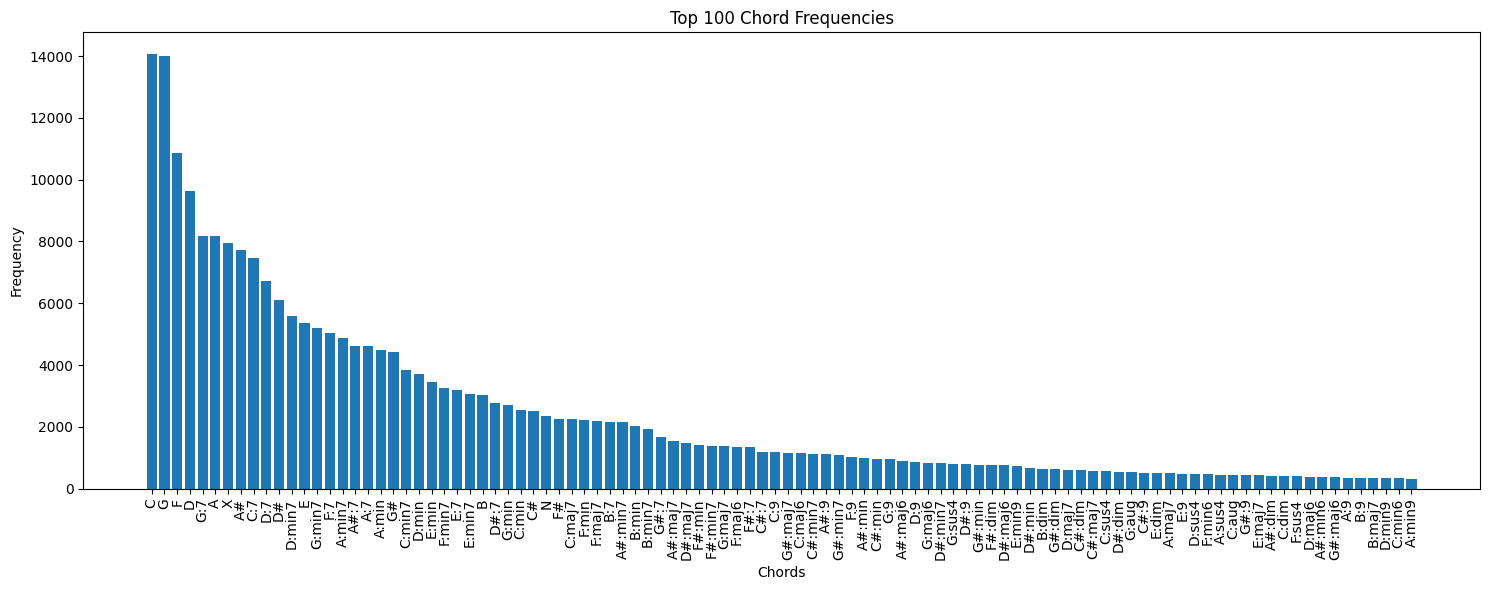

In [24]:
# prompt: Plot the number of chords appear sort top 100

from collections import Counter
import matplotlib.pyplot as plt

all_chords = []
for chord_list in B_final:
  all_chords.extend(chord_list)

chord_counts = Counter(all_chords)

top_100_chords = chord_counts.most_common(100)

chord_labels, chord_frequencies = zip(*top_100_chords)


plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
plt.bar(chord_labels, chord_frequencies)
plt.xlabel("Chords")
plt.ylabel("Frequency")
plt.title("Top 100 Chord Frequencies")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


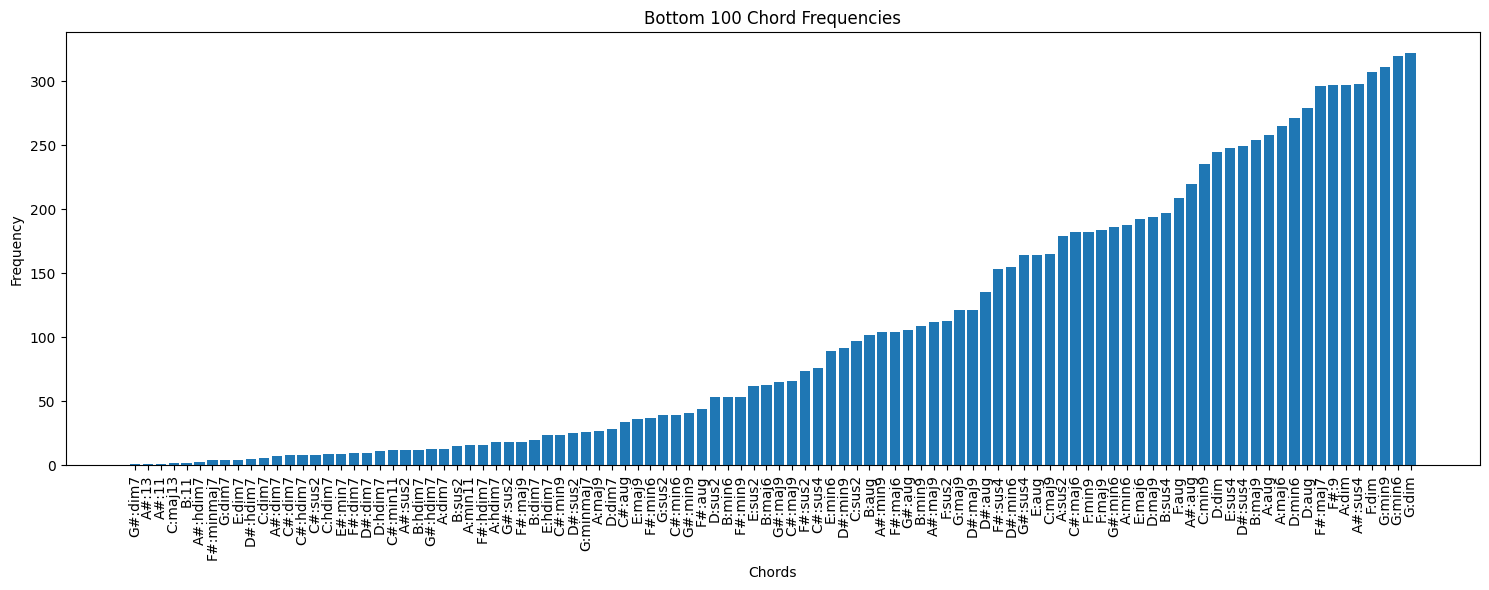

In [25]:
# prompt: Plot the number of chords appear sort bottom 100

import matplotlib.pyplot as plt
bottom_100_chords = chord_counts.most_common()[:-101:-1]

chord_labels, chord_frequencies = zip(*bottom_100_chords)


plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
plt.bar(chord_labels, chord_frequencies)
plt.xlabel("Chords")
plt.ylabel("Frequency")
plt.title("Bottom 100 Chord Frequencies")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


In [26]:
# prompt: get all keys in /content/chord.json
%cd /content
!git clone https://github.com/khangklj/Video2Music.git
%cd /content/dataset
import json

with open('/content/Video2Music/dataset/vevo_meta/chord.json', 'r') as f:
  data = json.load(f)

v2m_chords = list(data.keys())
v2m_chords.sort()
print(v2m_chords)

/content
Cloning into 'Video2Music'...
remote: Enumerating objects: 5610, done.
remote: Total 5610 (delta 0), reused 0 (delta 0), pack-reused 5610 (from 1)
Receiving objects: 100% (5610/5610), 45.16 MiB | 29.33 MiB/s, done.
Resolving deltas: 100% (3983/3983), done.
/content/dataset
['A', 'A#', 'A#:7', 'A#:aug', 'A#:dim', 'A#:dim7', 'A#:hdim7', 'A#:maj6', 'A#:maj7', 'A#:min', 'A#:min6', 'A#:min7', 'A#:sus2', 'A#:sus4', 'A:7', 'A:aug', 'A:dim', 'A:dim7', 'A:hdim7', 'A:maj6', 'A:maj7', 'A:min', 'A:min6', 'A:min7', 'A:sus2', 'A:sus4', 'B', 'B:7', 'B:aug', 'B:dim', 'B:dim7', 'B:hdim7', 'B:maj6', 'B:maj7', 'B:min', 'B:min6', 'B:min7', 'B:sus2', 'B:sus4', 'C', 'C#', 'C#:7', 'C#:aug', 'C#:dim', 'C#:dim7', 'C#:hdim7', 'C#:maj6', 'C#:maj7', 'C#:min', 'C#:min6', 'C#:min7', 'C#:sus2', 'C#:sus4', 'C:7', 'C:aug', 'C:dim', 'C:dim7', 'C:hdim7', 'C:maj6', 'C:maj7', 'C:min', 'C:min6', 'C:min7', 'C:sus2', 'C:sus4', 'D', 'D#', 'D#:7', 'D#:aug', 'D#:dim', 'D#:dim7', 'D#:hdim7', 'D#:maj6', 'D#:maj7', 'D#:mi

In [27]:
# prompt: check the different between v2m_chors and B_final

def compare_chord_lists(list1, list2):
  unique_chords_list1 = set([chord for chord in list1])
  unique_chords_list2 = set([chord for chord in list2])
  diff1 = unique_chords_list1 - unique_chords_list2
  diff2 = unique_chords_list2 - unique_chords_list1
  return diff1, diff2


diff1, diff2 = compare_chord_lists(get_unique_chords(B_final), v2m_chords)
print("Chords in B_final but not in v2m_chords:", diff1)
print("Chords in v2m_chords but not in B_final:", diff2)


Chords in B_final but not in v2m_chords: {'E:9', 'D#:maj9', 'F#:9', 'G:minmaj7', 'C:9', 'C#:maj9', 'A#:11', 'D#:9', 'A:9', 'F#:maj9', 'G#:min9', 'D:9', 'G:min9', 'B:11', 'C:maj9', 'B:maj9', 'G#:9', 'A#:min9', 'C#:9', 'C:min9', 'G:9', 'E#:min7', 'D#:min9', 'G#:maj9', 'F:min9', 'C#:min9', 'A#:9', 'A:min9', 'C#:min11', 'E:min9', 'G:maj9', 'B:min9', 'A#:maj9', 'B:9', 'D:min9', 'F:9', 'A:min11', 'D:maj9', 'F#:minmaj7', 'F#:min9', 'X', 'A:maj9', 'C:maj13', 'E:maj9', 'F:maj9', 'A#:13'}
Chords in v2m_chords but not in B_final: {'F:dim7', 'G:hdim7', 'F:hdim7'}


In [28]:
# prompt: train the word2vec
%cd /content
from gensim.models import Word2Vec

# Train Word2Vec model
model = Word2Vec(sentences=B_final, vector_size=512, window=5, min_count=1, workers=4, epochs=10)

# Save the model
model.save("word2vec.bin")


/content


In [29]:
# prompt: print the keys in key vector
tmp = list(model.wv.key_to_index.keys())
print(tmp)


['C', 'G', 'F', 'D', 'G:7', 'A', 'X', 'A#', 'C:7', 'D:7', 'D#', 'D:min7', 'E', 'G:min7', 'F:7', 'A:min7', 'A#:7', 'A:7', 'A:min', 'G#', 'C:min7', 'D:min', 'E:min', 'F:min7', 'E:7', 'E:min7', 'B', 'D#:7', 'G:min', 'C:min', 'C#', 'N', 'F#', 'C:maj7', 'F:min', 'F:maj7', 'B:7', 'A#:min7', 'B:min', 'B:min7', 'G#:7', 'A#:maj7', 'D#:maj7', 'F#:min', 'F#:min7', 'G:maj7', 'F:maj6', 'F#:7', 'C#:7', 'C:9', 'G#:maj7', 'C:maj6', 'C#:min7', 'A#:9', 'G#:min7', 'F:9', 'A#:min', 'C#:min', 'G:9', 'A#:maj6', 'D:9', 'G:maj6', 'D#:min7', 'G:sus4', 'D#:9', 'G#:min', 'F#:dim', 'D#:maj6', 'E:min9', 'D#:min', 'B:dim', 'G#:dim', 'D:maj7', 'C#:dim', 'C#:maj7', 'C:sus4', 'D#:dim', 'G:aug', 'C#:9', 'E:dim', 'A:maj7', 'E:9', 'D:sus4', 'F:min6', 'A:sus4', 'C:aug', 'G#:9', 'E:maj7', 'A#:dim', 'C:dim', 'F:sus4', 'D:maj6', 'A#:min6', 'G#:maj6', 'A:9', 'B:9', 'B:maj7', 'D:min9', 'C:min6', 'A:min9', 'G:dim', 'G:min6', 'G:min9', 'F:dim', 'A#:sus4', 'F#:9', 'A:dim', 'F#:maj7', 'D:aug', 'D:min6', 'A:maj6', 'A:aug', 'B:maj9'

In [30]:
# prompt: Compare difference between tmp and unique chord of B_final

unique_b_final = set([chord for sublist in B_final for chord in sublist])
unique_tmp = set(tmp)

diff_b_tmp = unique_b_final - unique_tmp
diff_tmp_b = unique_tmp - unique_b_final

print("Unique Chords in B_final but not in tmp:", diff_b_tmp)
print("Unique Chords in tmp but not in B_final:", diff_tmp_b)


Unique Chords in B_final but not in tmp: set()
Unique Chords in tmp but not in B_final: set()
